In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# PLOTTING PARAMS
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'font.family': 'Arial'})

FONT_BG = 25

mpl.rcParams['pdf.fonttype'] = 42 # allow text of pdf to be edited in illustrator

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

data_dir = '../APE\ analysis/data/'
fig_dir = './'

# Parker et al. modeling results

## APE

*Load data*

In [4]:
d = np.load(data_dir + 'parker/APE_DA.npz', allow_pickle=True)
    
daL = d['da_left']
daR = d['da_right']
scal_daL = d['scal_da_left']
scal_daR = d['scal_da_right']
actions = d['actions']
epoch = d['epoch']
rewards = d['rewards']
reward_trials = d['reward_trials']
states = d['states']

def find_choice_idx(states):
    # the states list begins with a bunch of 0s, choice timestep is the first
    # nonzero state
    
    for i in range(len(states)):
        if states[i] != 0:
            return i
    
    return None

*Left agent, outcome response*

In [5]:
da = daL

num_trials = len(da)
num_features = da[0][0].shape[0]

num_wait_states = int((num_features - 3) / 2)
neuron_labels = ['start', 'rewarded', 'unrewarded']
neuron_labels.extend(['left %d' % i for i in range(1, num_wait_states + 1)])
neuron_labels.extend(['right %d' % i for i in range(1, num_wait_states + 1)])

step_labels = ['start']
step_labels.extend(['step %d' % i for i in range(1, num_wait_states + 1)])
step_labels.append('outcome')

In [6]:
da = scal_daL
hide_aggregates = False
num_steps = 5
        
# Reward
resp = np.zeros(num_steps)
for idx in reward_trials:
    trial_da = da[idx]
    trial_states = states[idx]

    trial_choice_idx = find_choice_idx(trial_states)

    resp[0] += trial_da[0]  # start
    resp[1] += trial_da[trial_choice_idx]  # choice
    resp[2] += trial_da[trial_choice_idx + 1]  # next state
    resp[3] += trial_da[-1]  # outcome

resp /= len(reward_trials)
leftAPE_rewardresp = resp[3]

# Omission
omit_trials = []
for i in range(num_trials):
    if i not in reward_trials:
        omit_trials.append(i)
        
resp = np.zeros(num_steps)
for idx in omit_trials:
    trial_da = da[idx]
    trial_states = states[idx]

    trial_choice_idx = find_choice_idx(trial_states)

    resp[0] += trial_da[0]  # start
    resp[1] += trial_da[trial_choice_idx]  # choice
    resp[2] += trial_da[trial_choice_idx + 1]  # next state
    resp[3] += trial_da[-1]  # outcome

resp /= len(omit_trials)
leftAPE_omitresp = resp[3]

*Left agent, choice response*

In [7]:
da = scal_daL
hide_aggregates = False
num_steps = 5

lclb_trials = []
lcrb_trials = []
rclb_trials = []
rcrb_trials = []
for i in range(num_trials):
    if actions[i] == 0 and epoch[i] == 0:
        lclb_trials.append(i)
    elif actions[i] == 0 and epoch[i] == 1:
        lcrb_trials.append(i)
    elif actions[i] == 1 and epoch[i] == 1:
        rcrb_trials.append(i)
    elif actions[i] == 1 and epoch[i] == 0:
        rclb_trials.append(i)

# Aggregate left choice
if len(lclb_trials) + len(lcrb_trials) > 0 and not hide_aggregates:
    resp = np.zeros(num_steps)
    for idx in lclb_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0]  # start
        resp[1] += trial_da[trial_choice_idx]  # choice
        resp[2] += trial_da[trial_choice_idx + 1]  # next state
        resp[3] += trial_da[-1]  # outcome
    for idx in lcrb_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0]  # start
        resp[1] += trial_da[trial_choice_idx]  # choice
        resp[2] += trial_da[trial_choice_idx + 1]  # next state
        resp[3] += trial_da[-1]  # outcome

    resp /= (len(lclb_trials) + len(lcrb_trials))
    
leftAPE_lcresp = resp[1]

# Aggregate right choice
if len(rclb_trials) + len(rcrb_trials) > 0 and not hide_aggregates:
    resp = np.zeros(num_steps)
    for idx in rclb_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0]  # start
        resp[1] += trial_da[trial_choice_idx]  # choice
        resp[2] += trial_da[trial_choice_idx + 1]  # next state
        resp[3] += trial_da[-1]  # outcome
    for idx in rcrb_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0]  # start
        resp[1] += trial_da[trial_choice_idx]  # choice
        resp[2] += trial_da[trial_choice_idx + 1]  # next state
        resp[3] += trial_da[-1]  # outcome

    resp /= (len(rclb_trials) + len(rcrb_trials))

leftAPE_rcresp = resp[1]

*Right agent, outcome response*

In [8]:
da = scal_daR
hide_aggregates = False
num_steps = 5
        
# Reward
resp = np.zeros(num_steps)
for idx in reward_trials:
    trial_da = da[idx]
    trial_states = states[idx]

    trial_choice_idx = find_choice_idx(trial_states)

    resp[0] += trial_da[0]  # start
    resp[1] += trial_da[trial_choice_idx]  # choice
    resp[2] += trial_da[trial_choice_idx + 1]  # next state
    resp[3] += trial_da[-1]  # outcome

resp /= len(reward_trials)
rightAPE_rewardresp = resp[3]

# Omission
omit_trials = []
for i in range(num_trials):
    if i not in reward_trials:
        omit_trials.append(i)
        
resp = np.zeros(num_steps)
for idx in omit_trials:
    trial_da = da[idx]
    trial_states = states[idx]

    trial_choice_idx = find_choice_idx(trial_states)

    resp[0] += trial_da[0]  # start
    resp[1] += trial_da[trial_choice_idx]  # choice
    resp[2] += trial_da[trial_choice_idx + 1]  # next state
    resp[3] += trial_da[-1]  # outcome

resp /= len(omit_trials)
rightAPE_omitresp = resp[3]

*Right agent, choice response*

In [9]:
da = scal_daR
hide_aggregates = False
num_steps = 5

lclb_trials = []
lcrb_trials = []
rclb_trials = []
rcrb_trials = []
for i in range(num_trials):
    if actions[i] == 0 and epoch[i] == 0:
        lclb_trials.append(i)
    elif actions[i] == 0 and epoch[i] == 1:
        lcrb_trials.append(i)
    elif actions[i] == 1 and epoch[i] == 1:
        rcrb_trials.append(i)
    elif actions[i] == 1 and epoch[i] == 0:
        rclb_trials.append(i)

# Aggregate left choice
if len(lclb_trials) + len(lcrb_trials) > 0 and not hide_aggregates:
    resp = np.zeros(num_steps)
    for idx in lclb_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0]  # start
        resp[1] += trial_da[trial_choice_idx]  # choice
        resp[2] += trial_da[trial_choice_idx + 1]  # next state
        resp[3] += trial_da[-1]  # outcome
    for idx in lcrb_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0]  # start
        resp[1] += trial_da[trial_choice_idx]  # choice
        resp[2] += trial_da[trial_choice_idx + 1]  # next state
        resp[3] += trial_da[-1]  # outcome

    resp /= (len(lclb_trials) + len(lcrb_trials))
    
rightAPE_lcresp = resp[1]

# Aggregate right choice
if len(rclb_trials) + len(rcrb_trials) > 0 and not hide_aggregates:
    resp = np.zeros(num_steps)
    for idx in rclb_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0]  # start
        resp[1] += trial_da[trial_choice_idx]  # choice
        resp[2] += trial_da[trial_choice_idx + 1]  # next state
        resp[3] += trial_da[-1]  # outcome
    for idx in rcrb_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0]  # start
        resp[1] += trial_da[trial_choice_idx]  # choice
        resp[2] += trial_da[trial_choice_idx + 1]  # next state
        resp[3] += trial_da[-1]  # outcome

    resp /= (len(rclb_trials) + len(rcrb_trials))

rightAPE_rcresp = resp[1]

*Save APE responses*

In [10]:
left_resps = np.array([leftAPE_lcresp, leftAPE_rcresp, leftAPE_rewardresp, leftAPE_omitresp])
right_resps = np.array([rightAPE_lcresp, rightAPE_rcresp, rightAPE_rewardresp, rightAPE_omitresp])
np.savez(data_dir + 'parker/APE_agent_resps', left=left_resps, right=right_resps)

## RPE

*Load data*

In [11]:
d = np.load(data_dir + 'parker/RPE_DA.npz', allow_pickle=True)
    
da = d['da_simple']
actions = d['actions']
epoch = d['epoch']
rewards = d['rewards']
reward_trials = d['reward_trials']
states = d['states']

# Various useful variables
num_trials = len(da)
num_features = da[0][0].shape[0]

num_wait_states = int((num_features - 3) / 2)
neuron_labels = ['start', 'rewarded', 'unrewarded']
neuron_labels.extend(['left %d' % i for i in range(1, num_wait_states + 1)])
neuron_labels.extend(['right %d' % i for i in range(1, num_wait_states + 1)])

step_labels = ['start']
step_labels.extend(['step %d' % i for i in range(1, num_wait_states + 1)])
step_labels.append('outcome')

*Outcome responses*

In [12]:
hide_aggregates = False
num_steps = 5

LEFT_RPE_FEAT_IDX = 3
RIGHT_RPE_FEAT_IDX = 6

# Find omission trials
omit_trials = []
for i in range(num_trials):
    if i not in reward_trials:
        omit_trials.append(i)

# Compute responses for every feature
for i in range(num_features):
    
    # Reward response
    resp = np.zeros(num_steps)
    for idx in reward_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0][i]  # start
        resp[1] += trial_da[trial_choice_idx][i]  # choice
        resp[2] += trial_da[trial_choice_idx + 1][i]  # next state
        resp[3] += trial_da[-1][i]  # outcome

    resp /= len(reward_trials)
    
    if i == LEFT_RPE_FEAT_IDX:
        lRPE_rewardresp = resp[3]
    elif i == RIGHT_RPE_FEAT_IDX:
        rRPE_rewardresp = resp[3]
    
    # Omission response
    resp = np.zeros(num_steps)
    for idx in omit_trials:
        trial_da = da[idx]
        trial_states = states[idx]

        trial_choice_idx = find_choice_idx(trial_states)

        resp[0] += trial_da[0][i]  # start
        resp[1] += trial_da[trial_choice_idx][i]  # choice
        resp[2] += trial_da[trial_choice_idx + 1][i]  # next state
        resp[3] += trial_da[-1][i]  # outcome

    resp /= len(omit_trials)
    
    if i == LEFT_RPE_FEAT_IDX:
        lRPE_omitresp = resp[3]
    elif i == RIGHT_RPE_FEAT_IDX:
        rRPE_omitresp = resp[3]

*Choice responses*

In [13]:
### Unrewarded 

hide_aggregates = False
num_steps = 5

LEFT_RPE_FEAT_IDX = 3
RIGHT_RPE_FEAT_IDX = 6

lclb_trials = []
lcrb_trials = []
rclb_trials = []
rcrb_trials = []
for i in range(num_trials):
    if actions[i] == 0 and epoch[i] == 0:
        lclb_trials.append(i)
    elif actions[i] == 0 and epoch[i] == 1:
        lcrb_trials.append(i)
    elif actions[i] == 1 and epoch[i] == 1:
        rcrb_trials.append(i)
    elif actions[i] == 1 and epoch[i] == 0:
        rclb_trials.append(i)

for i in range(num_features):
    
    # Aggregate left choice
    if len(lclb_trials) + len(lcrb_trials) > 0:
        resp = np.zeros(num_steps)
        for idx in lclb_trials:
            trial_da = da[idx]
            trial_states = states[idx]
            
            trial_choice_idx = find_choice_idx(trial_states)
            
            resp[0] += trial_da[0][i]  # start
            resp[1] += trial_da[trial_choice_idx][i]  # choice
            resp[2] += trial_da[trial_choice_idx + 1][i]  # next state
            resp[3] += trial_da[-1][i]  # outcome
        for idx in lcrb_trials:
            trial_da = da[idx]
            trial_states = states[idx]
            
            trial_choice_idx = find_choice_idx(trial_states)
            
            resp[0] += trial_da[0][i]  # start
            resp[1] += trial_da[trial_choice_idx][i]  # choice
            resp[2] += trial_da[trial_choice_idx + 1][i]  # next state
            resp[3] += trial_da[-1][i]  # outcome

        resp /= (len(lclb_trials) + len(lcrb_trials))
        if i == LEFT_RPE_FEAT_IDX:
            lRPE_lcresp = resp[1]
        elif i == RIGHT_RPE_FEAT_IDX:
            rRPE_lcresp = resp[1]
    
    # Aggregate right choice
    if len(rclb_trials) + len(rcrb_trials) > 0:
        resp = np.zeros(num_steps)
        for idx in rclb_trials:
            trial_da = da[idx]
            trial_states = states[idx]
            
            trial_choice_idx = find_choice_idx(trial_states)
            
            resp[0] += trial_da[0][i]  # start
            resp[1] += trial_da[trial_choice_idx][i]  # choice
            resp[2] += trial_da[trial_choice_idx + 1][i]  # next state
            resp[3] += trial_da[-1][i]  # outcome
        for idx in rcrb_trials:
            trial_da = da[idx]
            trial_states = states[idx]
            
            trial_choice_idx = find_choice_idx(trial_states)
            
            resp[0] += trial_da[0][i]  # start
            resp[1] += trial_da[trial_choice_idx][i]  # choice
            resp[2] += trial_da[trial_choice_idx + 1][i]  # next state
            resp[3] += trial_da[-1][i]  # outcome

        resp /= (len(rclb_trials) + len(rcrb_trials))
        
        if i == LEFT_RPE_FEAT_IDX:
            lRPE_rcresp = resp[1]
        if i == RIGHT_RPE_FEAT_IDX:
            rRPE_rcresp = resp[1] 

*Save*

In [14]:
left_resp = np.array([lRPE_lcresp, lRPE_rcresp, lRPE_rewardresp, lRPE_omitresp])
right_resp = np.array([rRPE_lcresp, rRPE_rcresp, rRPE_rewardresp, rRPE_omitresp])
np.savez(data_dir + 'parker/RPE_agent_resps.npz', left=left_resp, right=right_resp)

*Plot figure*

In [15]:
# Left choice, right choice, reward, outcome
APE_data = np.load('./parker/APE_agent_resps.npz', allow_pickle=True)
leftAPE = APE_data['left']
rightAPE = APE_data['right']

RPE_data = np.load('./parker/RPE_agent_resps.npz', allow_pickle=True)
leftRPE = RPE_data['left']
rightRPE = RPE_data['right']

Text(0.5, 1.0, 'outcome')

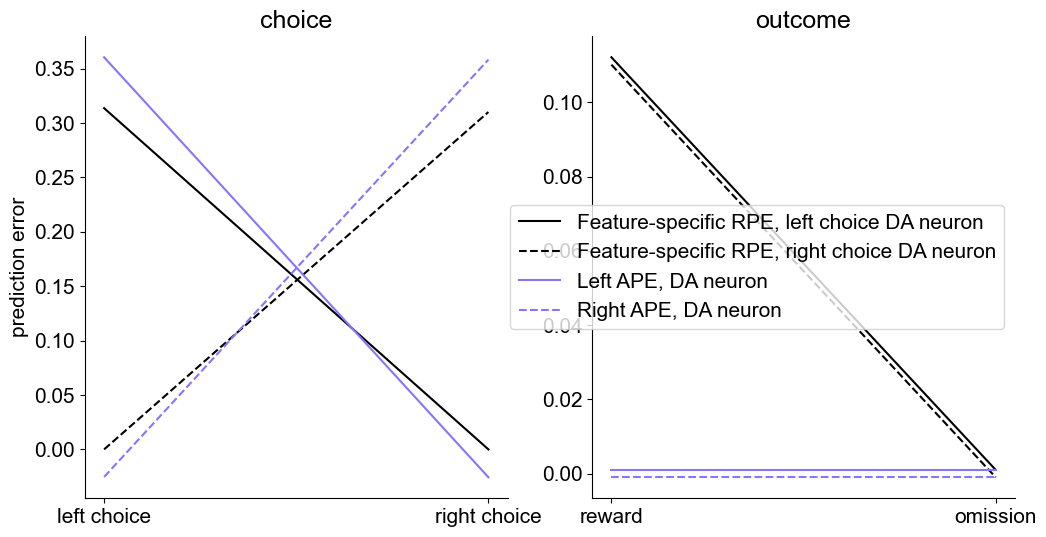

In [16]:
purple_DA_colour = '#8775FF'

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(np.arange(2), leftRPE[:2], label='Feature-specific RPE, left choice DA neuron', color='k')
plt.plot(np.arange(2), rightRPE[:2], label='Feature-specific RPE, right choice DA neuron', color='k', linestyle='--')
plt.plot(np.arange(2), leftAPE[:2], label='Left APE, DA neuron', color=purple_DA_colour)
plt.plot(np.arange(2), rightAPE[:2], label='Right APE, DA neuron', color=purple_DA_colour, linestyle='--')
plt.xticks(np.arange(2), ['left choice', 'right choice'])
plt.ylabel('prediction error')
plt.title('choice')

plt.subplot(1, 2, 2)
plt.plot(np.arange(2), leftRPE[2:]+0.001, label='Feature-specific RPE, left choice DA neuron', color='k')
plt.plot(np.arange(2), rightRPE[2:]-0.001, label='Feature-specific RPE, right choice DA neuron', color='k', linestyle='--')
plt.plot(np.arange(2), leftAPE[2:]+0.001, label='Left APE, DA neuron', color=purple_DA_colour)
plt.plot(np.arange(2), rightAPE[2:]-0.001, label='Right APE, DA neuron', color=purple_DA_colour, linestyle='--')
plt.xticks(np.arange(2), ['reward', 'omission'])
plt.legend()
plt.title('outcome')

plt.savefig(fig_dir + 'fig8d_parkerprimary.pdf', transparent=True)

# Jin and Costa modeling results

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl

# PLOTTING PARAMS
mpl.rcParams.update({'font.size': 15})
mpl.rcParams.update({'font.family': 'Arial'})

FONT_BG = 25

mpl.rcParams['pdf.fonttype'] = 42 # allow text of pdf to be edited in illustrator

mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

def find_trial_idxs(trial_states, is_right):
    important_idxs = []
    state_idx = int(is_right)
    for i in range(1, len(trial_states)):
        if trial_states[i][state_idx] > trial_states[i - 1][state_idx]:
            important_idxs.append(i)
    
    return important_idxs

def peak_normalize(signal):
    shifted = signal - np.min(signal)
    return shifted / np.max(shifted)

def peak_normalize_mat(M, rows=True):
    mat = M.copy()
    if rows:
        for i in range(mat.shape[0]):
            mat[i, :] = peak_normalize(mat[i, :])
    
    else:
        for i in range(mat.shape[1]):
            mat[:, i] = peak_normalize(mat[:, i])
    
    return mat

def sort_rows_by_peak(M):
    idxs = np.argsort(np.argmax(M, axis=1))
    return M.copy()[idxs, :]

## Scalar vs. feature-specific APE

In [18]:
d = np.load(data_dir + 'jincosta/DA_unchunked.npz', allow_pickle=True)
    
cgl = d['chunk_grad_L']
cgr = d['chunk_grad_R']
sl = d['scal_daL']
sr = d['scal_daR']
num_copies = d['num_copies']
fnl_reward_mags = d['reward_mags']
actions = d['actions']
states = d['states']
thresh = d['fr_schedule']
epoch = d['epoch']
phiL = d['staterepsL']
phiR = d['staterepsR']

num_trials = len(cgl)
num_features = cgl[0][0].shape[0]

[0 1 2 3 4 5 6 0 1 2 3 4 5 6 0 1 2 3 4 5 6]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


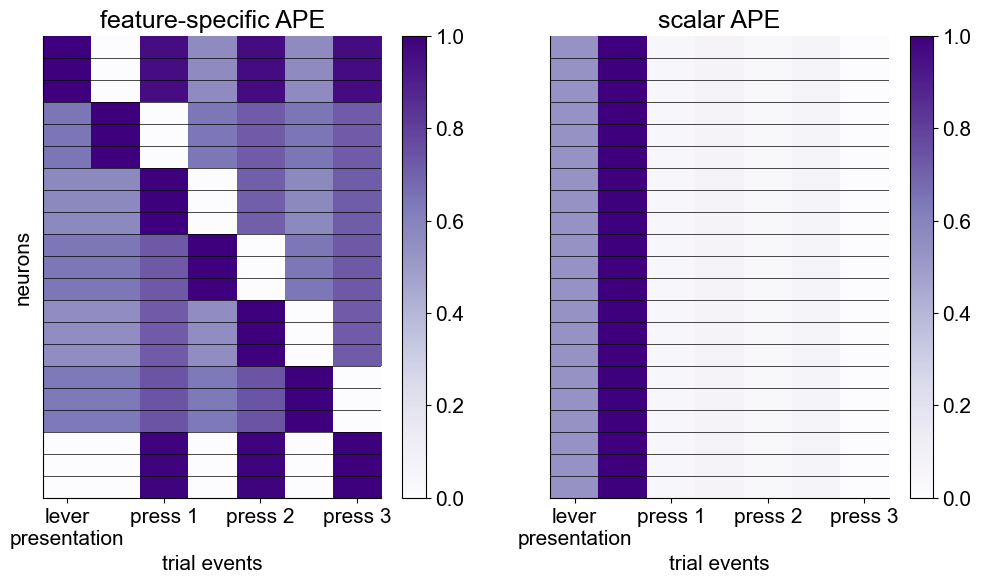

In [19]:
## Plot scalar vs vector heatmaps
cmap = 'Purples'
delimiter_col = 'k'
delimiter_w = 0.5

# Parameters
peak_normalize_neurons = True
num_steps = 7
neuron_labels = ['start', 'pm 1', 'p 1', 'pm 2', 'p 2', 'pm 3', 'p 3']
event_labels = ['lever\npresentation', 'press 1', 'press 2', 'press 3']
step_labels = neuron_labels

# Compute responses
cg_resp = np.zeros((num_trials, num_steps, num_features)) + np.nan
s_resp = np.zeros((num_trials, num_steps)) + np.nan
for i in range(num_trials):
    trial_states = states[i]
    try:
        first_choice, second_choice, third_choice = find_trial_idxs(trial_states, False)
    except:  # Was a right trial
        continue
        
    cg_resp[i, 0, :] = cgl[i][0]
    cg_resp[i, 1, :] = cgl[i][first_choice]
    cg_resp[i, 2, :] = cgl[i][first_choice + 1]
    cg_resp[i, 3, :] = cgl[i][second_choice]
    cg_resp[i, 4, :] = cgl[i][second_choice + 1]
    cg_resp[i, 5, :] = cgl[i][third_choice]
    cg_resp[i, 6, :] = cgl[i][third_choice + 1]
    
    s_resp[i, 0] = sl[i][0]
    s_resp[i, 1] = sl[i][first_choice]
    s_resp[i, 2] = sl[i][first_choice + 1]
    s_resp[i, 3] = sl[i][second_choice]
    s_resp[i, 4] = sl[i][second_choice + 1]
    s_resp[i, 5] = sl[i][third_choice]
    s_resp[i, 6] = sl[i][third_choice + 1]
    
mean_cg_resp = np.nanmean(cg_resp, axis=0)
mean_s_resp = np.nanmean(s_resp, axis=0).reshape(-1, 1)
mat_mean_s_resp = np.tile(mean_s_resp, (1, num_features))# / num_features

if peak_normalize_neurons:
    vmin = 0
    vmax = 1
else:
    vmax = max(np.max(mean_cg_resp), np.max(mat_mean_s_resp))
    vmin = min(np.min(mean_cg_resp), np.min(mat_mean_s_resp))

# Plot heatmaps
plt.figure(figsize=(12, 6))

# Vector APE
plt.subplot(1, 2, 1)

submat = mean_cg_resp.T
if peak_normalize_neurons:
    submat = peak_normalize_mat(submat)
    submat = sort_rows_by_peak(submat)

plt.imshow(submat, interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax, cmap=cmap)
plt.colorbar()
plt.xticks(np.arange(0, num_steps, 2), event_labels)
plt.yticks([])
plt.xlabel('trial events')
plt.ylabel('neurons')
plt.title('feature-specific APE')

# Add lines to heatmap to distinguish neurons
for i in range(num_features - 1):
    plt.axhline(0.5 + i, color=delimiter_col, linewidth=delimiter_w)

# Scalar APE
plt.subplot(1, 2, 2)
scal_neuron_labels = ['scal %d' % (i + 1) for i in range(len(neuron_labels))]

submat = mat_mean_s_resp.T
if peak_normalize_neurons:
    submat = peak_normalize_mat(submat)
    submat = sort_rows_by_peak(submat)
    
plt.imshow(submat, interpolation='nearest', aspect='auto', vmin=vmin, vmax=vmax, cmap=cmap)
plt.colorbar()
plt.xticks(np.arange(0, num_steps, 2), event_labels)
plt.yticks([])
plt.xlabel('trial events')
plt.title('scalar APE')

# Add lines to heatmap to distinguish neurons
for i in range(num_features - 1):
    plt.axhline(0.5 + i, color=delimiter_col, linewidth=delimiter_w)

if peak_normalize_neurons:
    plt.savefig(fig_dir + 'fig8_jinAPEtuning_peaknorm.pdf', transparent=True)
else:
    plt.savefig(fig_dir + 'fig8_jinAPEtuning_unnorm.pdf', transparent=True)

## Chunking responses

In [21]:
# Get unchunked responses

d = np.load(data_dir + 'jincosta/DA_unchunked.npz', allow_pickle=True)
    
cgl = d['chunk_grad_L']
cgr = d['chunk_grad_R']
phil = d['staterepsL']
phir = d['staterepsR']
num_copies = d['num_copies']
fnl_reward_mags = d['reward_mags']
actions = d['actions']
states = d['states']
thresh = d['fr_schedule']
epoch = d['epoch']

num_trials = len(cgl)
num_features = cgl[0][0].shape[0]

num_steps = 7
neuron_labels = ['start', 'premotor 1', 'press 1', 'premotor 2', 'press 2', 'premotor 3', 'press 3']
step_labels = neuron_labels

resp = np.zeros((num_trials, num_steps, num_features)) + np.nan
phi = np.zeros((num_trials, num_steps, num_features)) + np.nan
for i in range(num_trials):
    trial_states = states[i]
    try:
        first_choice, second_choice, third_choice = find_trial_idxs(trial_states, False)
    except:  # Was a right trial
        continue
        
    resp[i, 0, :] = cgl[i][0]
    resp[i, 1, :] = cgl[i][first_choice]
    resp[i, 2, :] = cgl[i][first_choice + 1]
    resp[i, 3, :] = cgl[i][second_choice]
    resp[i, 4, :] = cgl[i][second_choice + 1]
    resp[i, 5, :] = cgl[i][third_choice]
    resp[i, 6, :] = cgl[i][third_choice + 1]
    
    
    phi[i, 0, :] = phil[i][0]
    phi[i, 1, :] = phil[i][first_choice]
    phi[i, 2, :] = phil[i][first_choice + 1]
    phi[i, 3, :] = phil[i][second_choice]
    phi[i, 4, :] = phil[i][second_choice + 1]
    phi[i, 5, :] = phil[i][third_choice]
    phi[i, 6, :] = phil[i][third_choice + 1]
    
mean_resp_unchunked = np.nanmean(resp, axis=0).T
mean_phi_unchunked = np.nanmean(phi, axis=0).T

In [22]:
d = np.load(data_dir + 'jincosta/DA_chunked.npz', allow_pickle=True)
    
cgl = d['chunk_grad_L']
cgr = d['chunk_grad_R']
phil = d['staterepsL']
phir = d['staterepsR']
num_copies = d['num_copies']
fnl_reward_mags = d['reward_mags']
actions = d['actions']
states = d['states']
thresh = d['fr_schedule']
epoch = d['epoch']

num_trials = len(cgl)
num_features = cgl[0][0].shape[0]

num_steps = 7
neuron_labels = ['start', 'premotor 1', 'press 1', 'premotor 2', 'press 2', 'premotor 3', 'press 3']
step_labels = neuron_labels

resp = np.zeros((num_trials, num_steps, num_features)) + np.nan
phi = np.zeros((num_trials, num_steps, num_features)) + np.nan
for i in range(num_trials):
    trial_states = states[i]
    try:
        first_choice, second_choice, third_choice = find_trial_idxs(trial_states, False)
    except:  # Was a right trial
        continue
        
    resp[i, 0, :] = cgl[i][0]
    resp[i, 1, :] = cgl[i][first_choice]
    resp[i, 2, :] = cgl[i][first_choice + 1]
    resp[i, 3, :] = cgl[i][second_choice]
    resp[i, 4, :] = cgl[i][second_choice + 1]
    resp[i, 5, :] = cgl[i][third_choice]
    resp[i, 6, :] = cgl[i][third_choice + 1]
    
    phi[i, 0, :] = phil[i][0]
    phi[i, 1, :] = phil[i][first_choice]  # Dealing with pecularity in the underlying simulation code
    phi[i, 2, :] = phil[i][first_choice + 1]
    phi[i, 3, :] = phil[i][second_choice]
    phi[i, 4, :] = phil[i][second_choice + 1]
    phi[i, 5, :] = phil[i][third_choice]
    phi[i, 6, :] = phil[i][third_choice + 1]
    
mean_resp_chunked = np.nanmean(resp, axis=0).T
mean_phi_chunked = np.nanmean(phi, axis=0).T

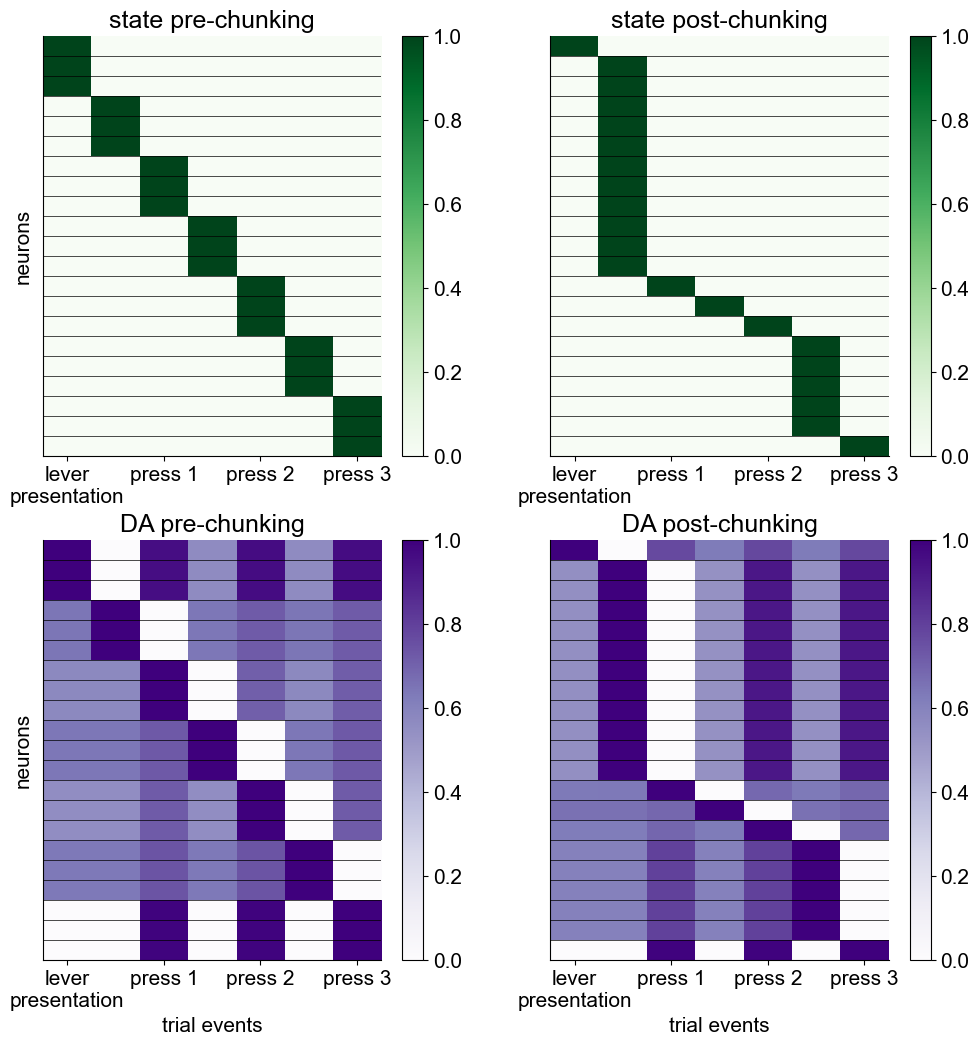

In [23]:
chunk_cmap = 'Greens'
DA_cmap = 'Purples'
delimiter_col = 'k'
delimiter_w = 0.5
peak_normalize_neurons = True
plt.figure(figsize=(12,12))
neuron_labels = ['start', 'pm 1', 'p 1', 'pm 2', 'p 2', 'pm 3', 'p 3']
event_labels = ['lever\npresentation', 'press 1', 'press 2', 'press 3']

## State representation, pre-chunking
# Plot heatmap
plt.subplot(2,2,1)
plt.title('state pre-chunking')
idxs = np.argsort(np.argmax(mean_phi_unchunked, axis=1))
if peak_normalize_neurons:
    plt.imshow(peak_normalize_mat(mean_phi_unchunked[idxs, :]), interpolation='nearest', aspect='auto',
               cmap = chunk_cmap)
else:
    plt.imshow(mean_phi_unchunked[idxs, :], interpolation='nearest', aspect='auto', cmap=chunk_cmap)
plt.xticks(np.arange(0, 7, 2), event_labels)
plt.yticks([])
plt.ylabel('neurons')
plt.colorbar()

# Add lines to heatmap to distinguish neurons
for i in range(num_features - 1):
    plt.axhline(0.5 + i, color=delimiter_col, linewidth=delimiter_w)

## State representation, post-chunking
# Heatmap
plt.subplot(2,2,2)
idxs = np.argsort(np.argmax(mean_phi_chunked, axis=1))
if peak_normalize_neurons:
    plt.imshow(peak_normalize_mat(mean_phi_chunked[idxs, :]), interpolation='nearest', aspect='auto',
               cmap=chunk_cmap)
else:
    plt.imshow(mean_phi_chunked[idxs, :], interpolation='nearest', aspect='auto', cmap=chunk_cmap)

plt.title('state post-chunking')
plt.xticks(np.arange(0, 7, 2), event_labels)
plt.yticks([])
plt.colorbar()

# Add lines to heatmap to distinguish neurons
for i in range(num_features - 1):
    plt.axhline(0.5 + i, color=delimiter_col, linewidth=delimiter_w)

## DA, pre-chunking
# Heatmap
plt.subplot(2,2,3)
idxs = np.argsort(np.argmax(mean_resp_unchunked, axis=1))
if peak_normalize_neurons:
    plt.imshow(peak_normalize_mat(mean_resp_unchunked[idxs, :]), interpolation='nearest', aspect='auto',
               cmap=DA_cmap)
else:
    plt.imshow(mean_resp_unchunked[idxs, :], interpolation='nearest', aspect='auto', cmap=DA_cmap)
plt.title('DA pre-chunking')
plt.xticks(np.arange(0, 7, 2), event_labels)
plt.yticks([])
plt.ylabel('neurons')
plt.colorbar()
plt.xlabel('trial events')

# Add lines to heatmap to distinguish neurons
for i in range(num_features - 1):
    plt.axhline(0.5 + i, color=delimiter_col, linewidth=delimiter_w)

## DA, post-chunking
# Heatmap
plt.subplot(2,2,4)
idxs = np.argsort(np.argmax(mean_resp_chunked, axis=1))
if peak_normalize_neurons:
    plt.imshow(peak_normalize_mat(mean_resp_chunked[idxs, :]), interpolation='nearest', aspect='auto',
               cmap=DA_cmap)
else:
    plt.imshow(mean_resp_chunked[idxs, :], interpolation='nearest', aspect='auto', cmap=DA_cmap)
plt.title('DA post-chunking')
plt.xticks(np.arange(0, 7, 2), event_labels)
plt.yticks([])
plt.colorbar()
plt.xlabel('trial events')

# Add lines to heatmap to distinguish neurons
for i in range(num_features - 1):
    plt.axhline(0.5 + i, color=delimiter_col, linewidth=delimiter_w)

if peak_normalize_neurons:
    plt.savefig(fig_dir + 'fig8_chunkingheatmaps_peaknorm.pdf', transparent=True)
else:
    plt.savefig(fig_dir + 'fig8_chunkingheatmaps_unnorm.pdf', transparent=True)